In [12]:
# Importing only the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.cluster import KMeans

# For classification and clustering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [13]:
location  = r"D:\Bizmetric Intership\Dataset\datasets\datasets\beauty.csv"
df = pd.read_csv(location)
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [14]:
#drop y col
df_cluster = df.copy()
if 'looks' in df_cluster.columns:
    df_cluster = df_cluster.drop('looks', axis=1)


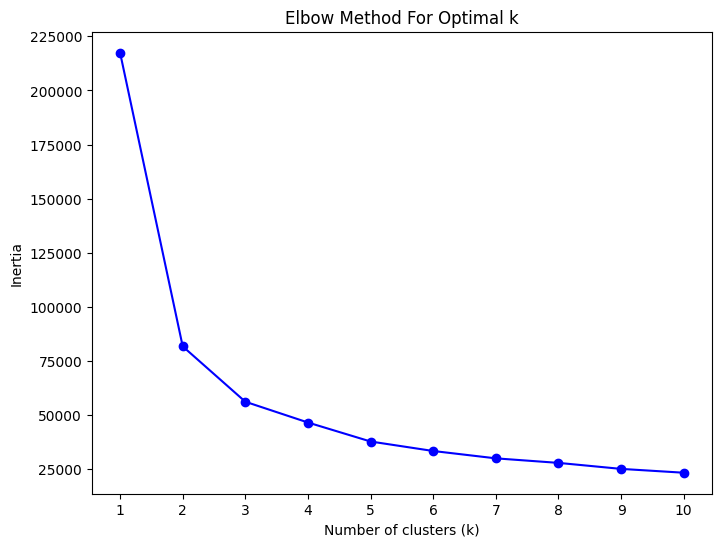

In [15]:

# Elbow method to find the optimal number of clusters for KMeans
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

In [16]:
# Select first two numeric columns for plotting
numeric_cols = df_cluster.select_dtypes(include=[np.number]).columns.tolist()
x_col, y_col = numeric_cols[1], numeric_cols[2]

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Assign clusters before classification
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_cluster)
df_cluster['cluster'] = clusters

# Classification to predict cluster labels

X = df_cluster.drop('cluster', axis=1)
y = df_cluster['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]})
}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print(f"Model: {name}")
    print("Best Params:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)

Model: RandomForest
Best Params: {'max_depth': None, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      1.00      1.00        51
           2       1.00      0.99      0.99        78

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

------------------------------------------------------------
Model: KNN
Best Params: {'n_neighbors': 7}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       123
           1       0.96      0.96      0.96        51
           2       0.95      0.97      0.96        78

    accuracy                           0.98       252
   macro avg       0.97      0.97      0.97       252
weighted avg       0.98      0.98      0.98       252

-------------